In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense,
    Dropout, BatchNormalization, Input
)
from tensorflow.keras.models import Sequential, Model
import time
from PIL import Image

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [22]:
# Carica i dati MNIST
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print('Forma originale X_train:', X_train.shape)
print('Forma originale Y_train:', Y_train.shape)

# CORREZIONE: Per CNN, mantieni la forma 2D e aggiungi il canale
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)  # Aggiungi dimensione del canale
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print('Forma dopo reshape X_train:', X_train.shape)
print('Forma dopo reshape X_test:', X_test.shape)

# Normalizza i dati
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Converti le etichette in formato categorico
num_classes = 10
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

Forma originale X_train: (60000, 28, 28)
Forma originale Y_train: (60000,)
Forma dopo reshape X_train: (60000, 28, 28, 1)
Forma dopo reshape X_test: (10000, 28, 28, 1)


Esempio di etichetta: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


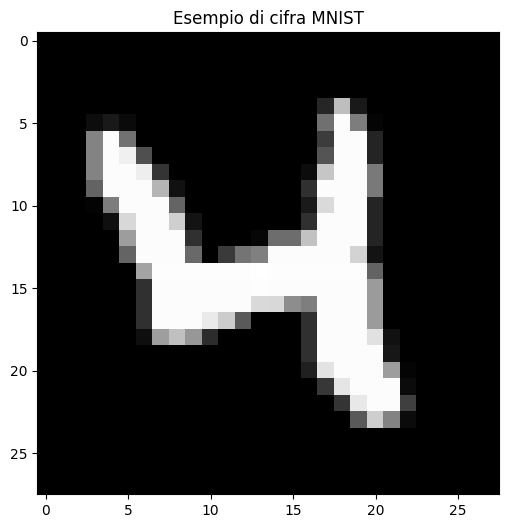

In [23]:
print('Esempio di etichetta:', Y_train[20])
plt.figure(figsize=(6, 6))
plt.imshow(X_train[20].reshape(28, 28), cmap='gray')
plt.title('Esempio di cifra MNIST')
plt.show()

In [24]:
def create_CNN():
    model = Sequential([
        # Input layer - CORREZIONE: forma corretta per MNIST
        Input(shape=(28, 28, 1)),  # 28x28 pixel, 1 canale (grayscale)
        
        # Primo blocco convoluzionale
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Secondo blocco convoluzionale
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Terzo blocco convoluzionale
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
        
        # Flatten e layer densi
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        
        # Output layer
        Dense(10, activation='softmax')  # 10 classi per le cifre 0-9
    ])
    
    # Compila il modello
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


In [25]:
# Parametri di training
batch_size = 32
epochs = 15

# Crea il modello CNN
model_CNN = create_CNN()

# Mostra la struttura del modello
print("\nStruttura del modello:")
model_CNN.summary()

# Training
print("\nInizio training...")
history = model_CNN.fit(
    X_train, Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, Y_test)
)

print('Modello addestrato con successo!')


Struttura del modello:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 471,402 (1.80 MB)

 Trainable params: 469,930 (1.79 MB)

 Non-trainable params: 1,472 (5.75 KB)


Inizio training...
Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 24ms/step - accuracy: 0.7805 - loss: 0.7959 - val_accuracy: 0.9803 - val_loss: 0.0621
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9620 - loss: 0.1372 - val_accuracy: 0.9839 - val_loss: 0.0499
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9722 - loss: 0.0998 - val_accuracy: 0.9913 - val_loss: 0.0290
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9762 - loss: 0.0896 - val_accuracy: 0.9861 - val_loss: 0.0494
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9796 - loss: 0.0804 - val_accuracy: 0.9909 - val_loss: 0.0299
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9823 - loss: 0.0676 - val_accuracy: 0.9897 - val_loss: 0.0368
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9831 - loss: 0.0659 - val_accuracy: 0.9924 - val_loss: 0.0274
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step 


Accuracy sul test set: 0.9941


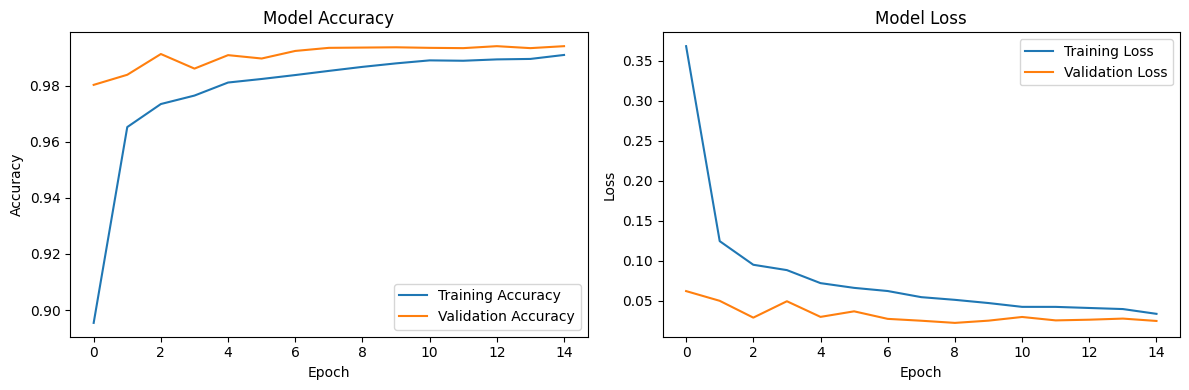

In [26]:
# Valuta il modello
test_loss, test_acc = model_CNN.evaluate(X_test, Y_test, verbose=0)
print(f'\nAccuracy sul test set: {test_acc:.4f}')

# Plotta la storia del training
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
directory = "/Users/marta/Documents/LSN/12/digits"
data_list = []
data_values = []

# Define valid image extensions
valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.webp'}

# List all files in the directory
for filename in os.listdir(directory):
    # Skip hidden files and non-image files
    if filename.startswith('.'):
        continue
    
    # Check if file has a valid image extension
    file_ext = os.path.splitext(filename)[1].lower()
    if file_ext not in valid_extensions:
        continue
    
    # Construct the full file path
    file_path = os.path.join(directory, filename)
    
    try:
        # Open the image, convert to grayscale, and process it
        digit_in = Image.open(file_path).convert('L')
        img_rows, img_cols = digit_in.size
        # print(f"Image {filename} size: {img_rows}x{img_cols}")
        
        # Invert image
        pix = digit_in.load()
        data = np.zeros((img_rows, img_cols))
        for j in range(img_cols):
            for i in range(img_rows):
                data[i, j] = pix[j, i]
        data /= 255
        data_list.append(data)
        
        # Extract the digit from the filename and append to data_values
        digit = int(filename[0])
        data_values.append(digit)
        
    except (UnidentifiedImageError, ValueError) as e:
        print(f"Skipping file {filename}: {e}")
        continue

size_data_list = len(data_list)
print("Size of data_list:", size_data_list)

Size of data_list: 10


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


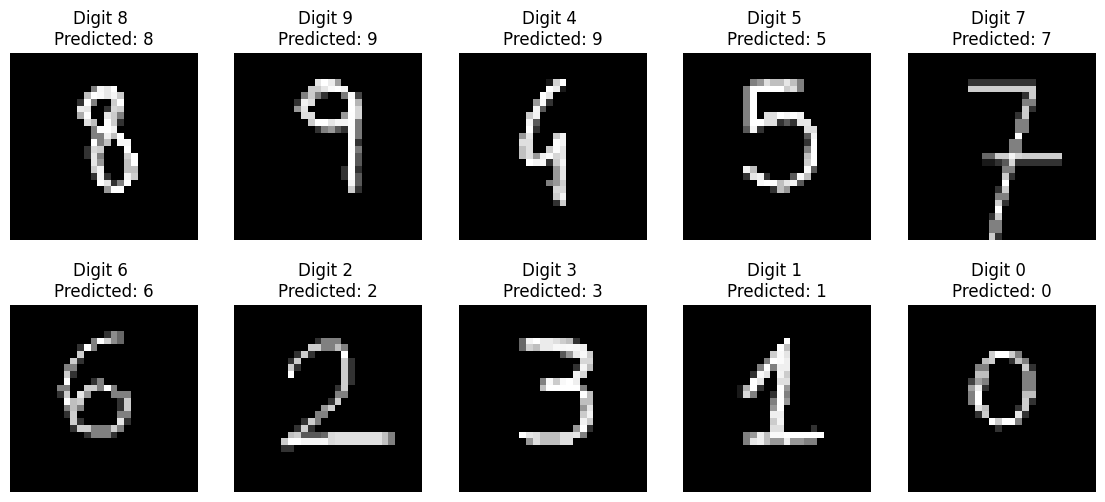

In [34]:
num_cols = 5
num_rows = int(np.ceil(len(data_list) / num_cols))

plt.figure(figsize=(14, 3*num_rows))

for i, data in enumerate(data_list):
   # Reshape data for prediction 
   data = data.reshape(1, img_rows, img_cols, 1)
   prediction = model_CNN.predict(data)
   # Reshape data for plotting
   data = data.reshape(img_rows, img_cols)
   # Plot with prediction
   ax = plt.subplot(num_rows, num_cols, i + 1)
   plt.imshow(data, cmap='gray')
   plt.title(f"Digit {data_values[i]} \nPredicted: {np.argmax(prediction)}")
   plt.axis('off')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()